In [1]:
from torch import nn
import torch
import torch.nn.functional as F

In [2]:
lstm_cell = nn.LSTMCell(input_size=5,hidden_size=7)

In [3]:
lstm_cell.weight_hh.shape

torch.Size([28, 7])

In [4]:
lstm_cell.weight_ih.shape

torch.Size([28, 5])

In [7]:
input = torch.randn(3, 2, 5)
h0 = torch.randn(1, 2, 7)
c0 = torch.randn(1, 2, 7)
lstm = nn.LSTM(input_size=5, hidden_size=7)

In [8]:
output, (h1, c1) = lstm(input, (h0, c0))

In [9]:
output

tensor([[[-0.2768, -0.0483,  0.0570, -0.3635, -0.2310, -0.1468,  0.1702],
         [-0.0180, -0.1351,  0.2322,  0.4628, -0.2554, -0.2832, -0.0265]],

        [[-0.1133,  0.0929, -0.0237,  0.0139, -0.0559, -0.2577, -0.2729],
         [ 0.2053, -0.1437,  0.0364,  0.1516, -0.2450, -0.1647, -0.1647]],

        [[ 0.1591, -0.0875, -0.0802,  0.0322, -0.1238, -0.2201, -0.1045],
         [ 0.0282, -0.1554, -0.0186,  0.0957, -0.1119, -0.1427, -0.2525]]],
       grad_fn=<StackBackward0>)

In [10]:
output.shape

torch.Size([3, 2, 7])

In [11]:
h1.shape

torch.Size([1, 2, 7])

In [12]:
c1.shape

torch.Size([1, 2, 7])

In [14]:
import matplotlib.pyplot as plt
import numpy as np

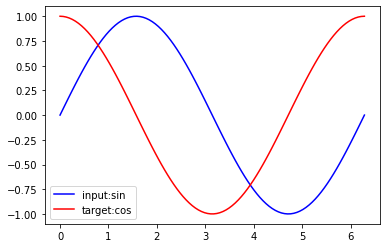

In [15]:
steps = np.linspace(0, np.pi*2, 100, dtype=np.float32)
input_x = np.sin(steps)
target_x = np.cos(steps)
plt.plot(steps, input_x, 'b-', label='input:sin')
plt.plot(steps, target_x, 'r-', label='target:cos')
plt.legend()
plt.show()

In [16]:
class LSTM(nn.Module):
    def __init__(self, INPUT_SIZE):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(
            input_size=INPUT_SIZE,
            hidden_size=20,
            batch_first=True,
        )
        self.out=nn.Linear(20,1)
    
    def forward(self, x, h_state, c_state):
        r_out, (h_state, c_state) = self.lstm(x, (h_state, c_state))
        outputs = self.out(r_out[0,:]).unsqueeze(0)
        return outputs, h_state, c_state

    def InitHidden(self):
        h_state = torch.randn(1,1,20)
        c_state = torch.randn(1,1,20)
        return h_state, c_state

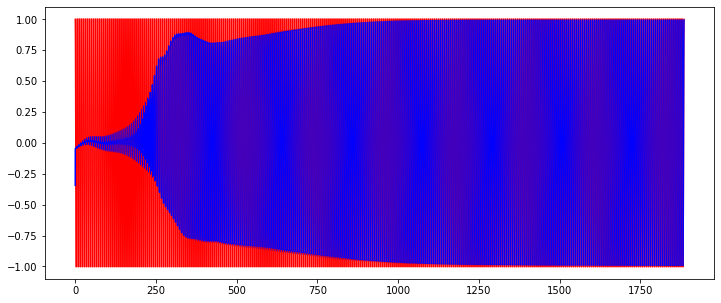

In [17]:
lstm = LSTM(INPUT_SIZE=1)
optimizer = torch.optim.Adam(lstm.parameters(), lr=0.001)
loss_func = nn.MSELoss()
h_state, c_state = lstm.InitHidden()
plt.figure(1, figsize=(12,5))
plt.ion()
for step in range(600):
    start, end = step * np.pi, (step+1)*np.pi
    steps = np.linspace(start, end, 100, dtype=np.float32)
    x_np = np.sin(steps)
    y_np = np.cos(steps)
    x = torch.from_numpy(x_np).unsqueeze(0).unsqueeze(-1)
    y = torch.from_numpy(y_np).unsqueeze(0).unsqueeze(-1)
    prediction, h_state, c_state = lstm(x, h_state, c_state)
    h_state = h_state.data
    c_state = c_state.data
    loss = loss_func(prediction, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    plt.plot(steps, y_np.flatten(), 'r-')
    plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
    # plt.show()
plt.ioff()
plt.show()